In [1]:
import cv2 
import numpy as np
import json
from os import listdir
import os 
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## ✔️ json 데이터 불러오기

In [2]:
read_jsonfile = "Crowdworks_keypoint_result_500obj.json"
# with open(read_jsonfile) as f : 
#     data = json.load(f)
f = open(read_jsonfile, 'r')

json_data_li = []
while True:
    line = f.readline()
    if not line: break
    data = json.loads(line)
    json_data_li.append(data)
#     print(json.dumps(data,indent =2))  

f.close()

## 👉 dot 이미지 잘 찍혔는지 확인하는 용도 (저장 X)

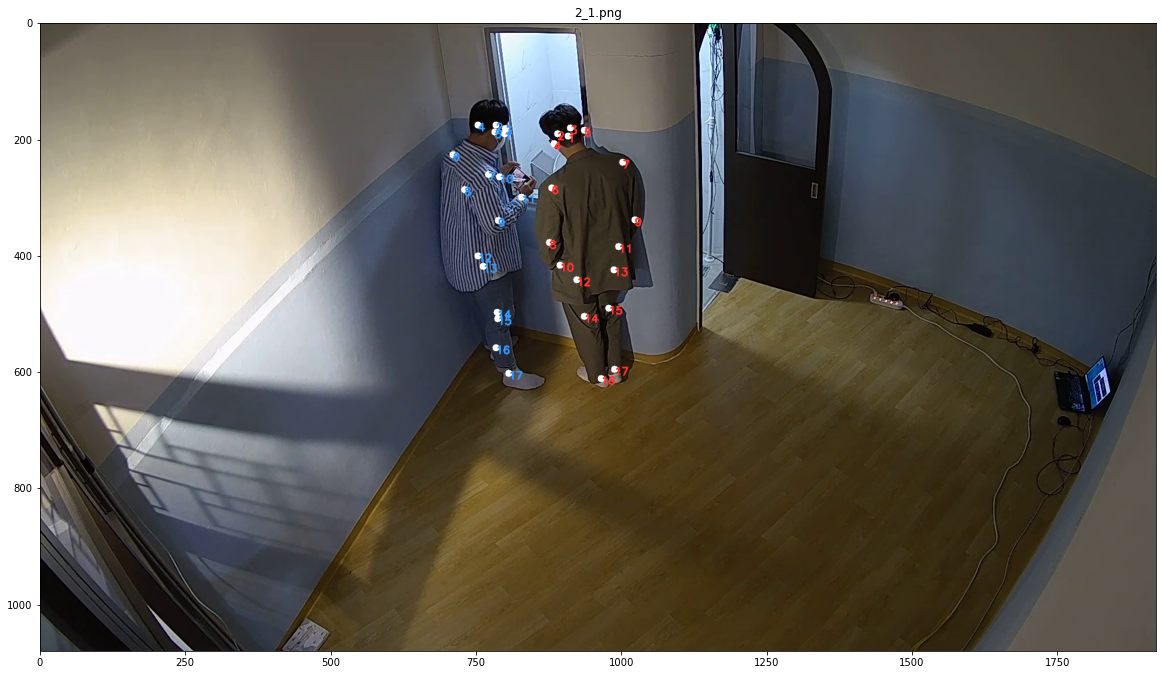

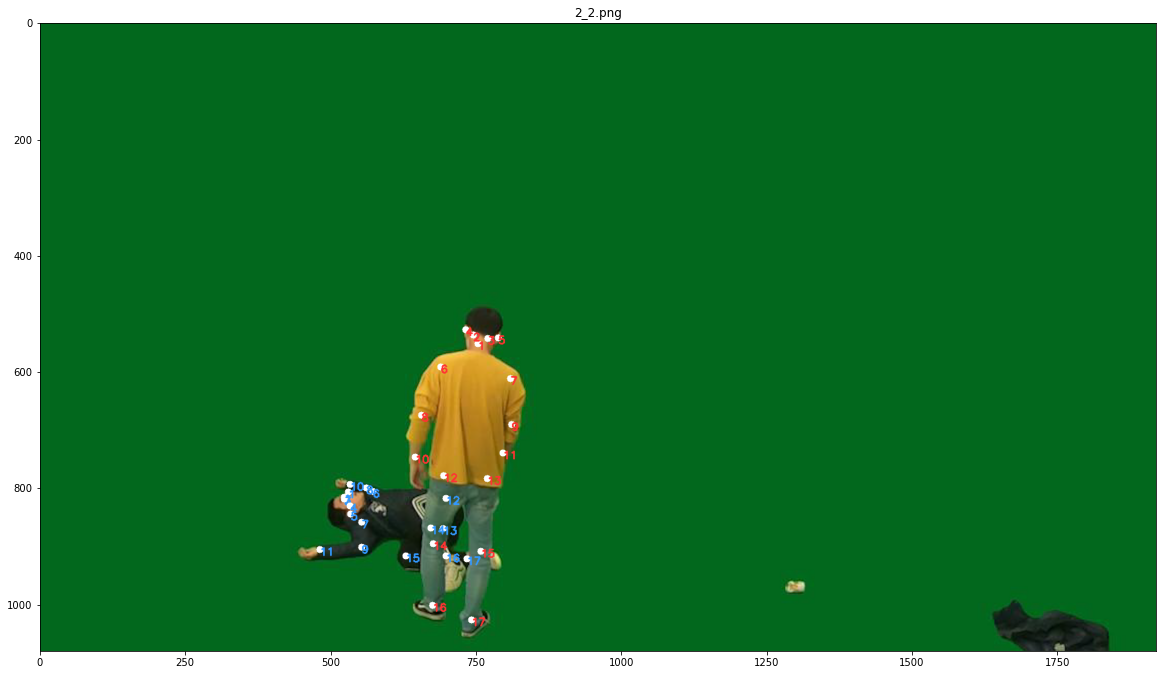

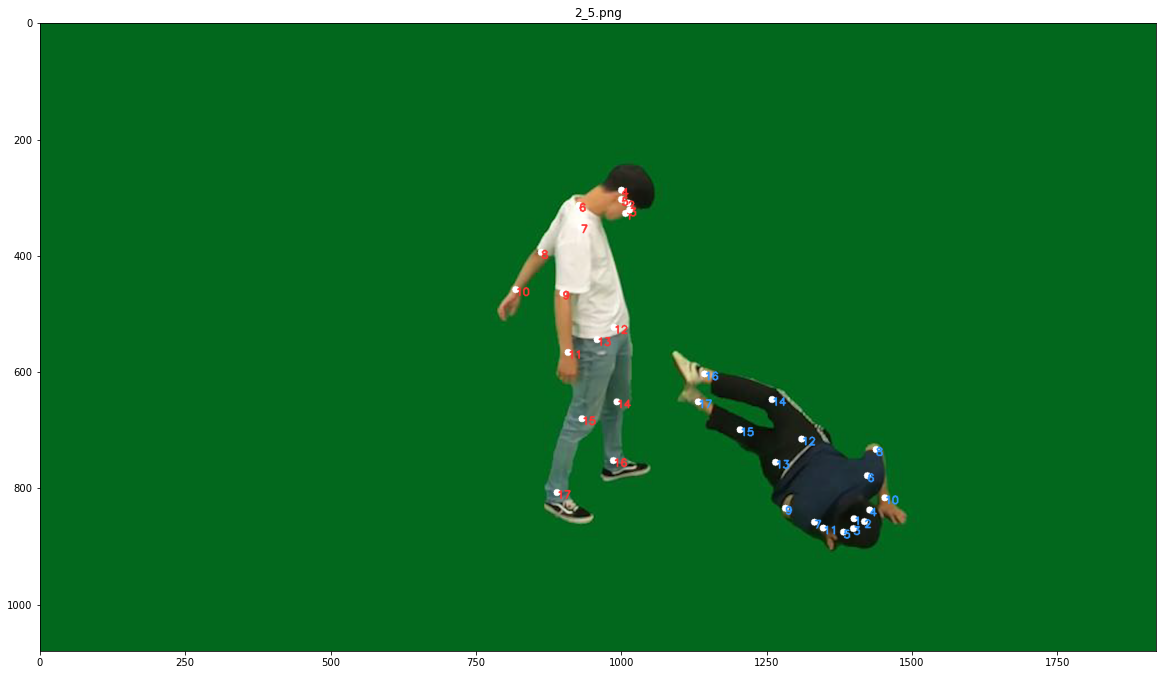

In [5]:
if not os.path.isdir('./skeleton_dot_img'):
    os.makedirs('./skeleton_dot_img')

for sub_data in json_data_li[:3]:
    img_file = sub_data['name_ZRE7B2']['sourceValue']

    # input_images 폴더에 파일이 없으면 skip
    if not os.path.isfile(f'./input_images/{img_file}'):
        continue
        
    img = cv2.imread(f'input_images/{img_file}')
    
    for idx in range(len(sub_data['name_ZRE7B2']['data'])):
        # 1번째 객체에는 분홍색 txt 색상 부여
        if idx == 0:
            num_txt_color = (51, 51, 255)
        # 2번째 객체에는 하늘색 txt 색상 부여
        else:
            num_txt_color = (255, 153, 51)
            
        for point_idx, point in enumerate(sub_data['name_ZRE7B2']['data'][idx]['value']['points']):
#             print(f'x 좌표 : {point["x"]}, y 좌표 : {point["y"]}')
            circle_center = (int(point["x"]), int(point["y"]))
    
            img = cv2.circle(img, center=circle_center, radius=6, color=(255, 255, 255), thickness=-1)
            img = cv2.putText(img, str(point_idx+1), (int(point["x"]), int(point["y"])+10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, num_txt_color, 2)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # imshow 함수 사용할 때 활성화
    plt.figure(figsize=(20, 20))
    plt.title(img_file)
    plt.imshow(img)

## 📌 dot 찍은 이미지 저장

In [11]:
# skleton_dot_img 폴더 생성
if not os.path.isdir('./skeleton_dot_img'):
    os.makedirs('./skeleton_dot_img')

for sub_data in tqdm(json_data_li[:]):
    img_file = sub_data['name_ZRE7B2']['sourceValue']

    # input_images 폴더에 파일이 없으면 skip
    if not os.path.isfile(f'./input_images/{img_file}'):
        continue
        
    img = cv2.imread(f'input_images/{img_file}')
    
    for idx in range(len(sub_data['name_ZRE7B2']['data'])):
        # 1번째 객체에는 분홍색 txt 색상 부여
        if idx == 0:
            num_txt_color = (51, 51, 255)
        # 2번째 객체에는 하늘색 txt 색상 부여
        else:
            num_txt_color = (255, 153, 51)
            
        for point_idx, point in enumerate(sub_data['name_ZRE7B2']['data'][idx]['value']['points']):
#             print(f'x 좌표 : {point["x"]}, y 좌표 : {point["y"]}')
            circle_center = (int(point["x"]), int(point["y"]))
    
            img = cv2.circle(img, center=circle_center, radius=6, color=(255, 255, 255), thickness=-1)
            img = cv2.putText(img, str(point_idx+1), (int(point["x"]), int(point["y"])+10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, num_txt_color, 2)
    
    cv2.imwrite(f'./skeleton_dot_img/{img_file}', img)

  0%|          | 0/250 [00:00<?, ?it/s]

## ✅ 처리 안 된 이미지들

In [66]:
# 이미지는 있지만, skeleton json 정보가 없어서 처리가 안 된 케이스
set(os.listdir('input_images')) - set(os.listdir('skeleton_dot_img'))

{'2_223.png', '2_225.png'}